In [17]:
import pandas as pd

movies = pd.read_csv("dataset/movies_metadata.csv", low_memory=False)
credits = pd.read_csv("dataset/credits.csv")
keywords = pd.read_csv("dataset/keywords.csv")
links = pd.read_csv("dataset/links.csv")

print(movies.shape, credits.shape, keywords.shape, links.shape)


(45466, 24) (45476, 3) (46419, 2) (45843, 3)


In [18]:
movies["id"] = pd.to_numeric(movies["id"], errors="coerce")
credits["id"] = pd.to_numeric(credits["id"], errors="coerce")
keywords["id"] = pd.to_numeric(keywords["id"], errors="coerce")
links["tmdbId"] = pd.to_numeric(links["tmdbId"], errors="coerce")

movies = movies.dropna(subset=["id"])


In [19]:
# movies + credits
df = movies.merge(credits, on="id", how="left")

# + keywords
df = df.merge(keywords, on="id", how="left")

# + links (связываем по tmdbId)
df = df.merge(links, left_on="id", right_on="tmdbId", how="left")

print(df.shape)
df.head()


(46911, 30)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,cast,crew,keywords,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,114709,862.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2,113497,8844.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3,113228,15602.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",4,114885,31357.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5,113041,11862.0


In [20]:
import ast

def parse_json_list(x, key="name"):
    try:
        return [d[key] for d in ast.literal_eval(x)]
    except:
        return []

df["genres_list"] = df["genres"].apply(parse_json_list)
df["keywords_list"] = df["keywords"].apply(parse_json_list)

def parse_cast(x, n=5):
    try:
        data = ast.literal_eval(x)
        return [d["name"] for d in data[:n]]
    except:
        return []

def parse_director(x):
    try:
        for d in ast.literal_eval(x):
            if d["job"] == "Director":
                return d["name"]
    except:
        pass
    return None

df["top_cast"] = df["cast"].apply(parse_cast)
df["director"] = df["crew"].apply(parse_director)


In [21]:
df_final = df[[
    "id", "title", "overview",
    "genres_list", "keywords_list",
    "top_cast", "director",
    "popularity", "vote_average", "vote_count",
    "budget", "revenue",
    "original_language", "release_date",
    "movieId", "imdbId"
]]

print(df_final.shape)
df_final.head()


(46911, 16)


,id,title,overview,genres_list,keywords_list,top_cast,director,popularity,vote_average,vote_count,budget,revenue,original_language,release_date,movieId,imdbId
0,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,21.946943,7.7,5415.0,30000000,373554033.0,en,1995-10-30,1,114709
1,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,17.015539,6.9,2413.0,65000000,262797249.0,en,1995-12-15,2,113497
2,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,11.7129,6.5,92.0,0,0.0,en,1995-12-22,3,113228
3,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,3.859495,6.1,34.0,16000000,81452156.0,en,1995-12-22,4,114885
4,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,8.387519,5.7,173.0,0,76578911.0,en,1995-02-10,5,113041


In [23]:
df_final = df_final.copy()

df_final["full_text"] = (
    df_final["overview"].fillna("") + " " +
    df_final["genres_list"].apply(lambda x: " ".join(x)) + " " +
    df_final["keywords_list"].apply(lambda x: " ".join(x)) + " " +
    df_final["top_cast"].apply(lambda x: " ".join(x)) + " " +
    df_final["director"].fillna("")
)


In [24]:
# работаем с копией
data = df_final.copy()

# уберём пустые тексты
data["full_text"] = data["full_text"].fillna("").str.strip()
data = data[data["full_text"].str.len() > 100]

# оставим только английские фильмы
data = data[data["original_language"] == "en"]

print("После очистки:", data.shape)


После очистки: (32811, 17)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.7,
    min_df=20,
    stop_words="english",
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(data["full_text"])
print("TF-IDF shape:", X.shape)


TF-IDF shape: (32811, 13427)


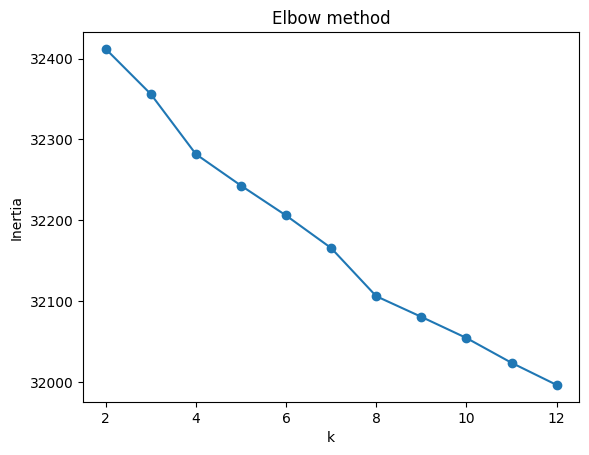

In [26]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 13)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

import matplotlib.pyplot as plt
plt.plot(K, inertia, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()


In [27]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
data["cluster"] = kmeans.fit_predict(X)

data["cluster"].value_counts()


cluster
5    11895
4     6125
0     4746
1     4106
3     3429
2     2510
Name: count, dtype: int64

In [28]:
for i in range(k):
    print(f"\n=== Cluster {i} ===")
    print(data[data["cluster"] == i]["title"].head(10).tolist())



=== Cluster 0 ===
['Heat', 'Sudden Death', 'GoldenEye', 'Casino', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Dead Presidents', 'Se7en']

=== Cluster 1 ===
['Dracula: Dead and Loving It', 'Richard III', 'Mary Reilly', 'Vampire in Brooklyn', 'Braveheart', 'The Addiction', 'Crimson Tide', 'Lord of Illusions', 'Nadja', 'The Prophecy']

=== Cluster 2 ===
['Powder', 'Twelve Monkeys', 'Lawnmower Man 2: Beyond Cyberspace', 'Screamers', 'Shopping', 'Congo', 'Johnny Mnemonic', 'Judge Dredd', 'Mighty Morphin Power Rangers: The Movie', 'Species']

=== Cluster 3 ===
['Nico Icon', 'Heidi Fleiss: Hollywood Madam', 'Catwalk', 'Anne Frank Remembered', "Jupiter's Wife", 'Sonic Outlaws', 'From the Journals of Jean Seberg', 'Crumb', 'The Show', 'Unzipped']

=== Cluster 4 ===
['Waiting to Exhale', 'Sabrina', 'The American President', 'Sense and Sensibility', 'Four Rooms', 'Leaving Las Vegas', 'Now and Then', 'Persuasion', 'Dangerous Minds', 'Carrington']

=== Cluster 5 ===
['Toy Story', 'Jumanj

In [29]:
import numpy as np

terms = np.array(vectorizer.get_feature_names_out())

for i in range(k):
    center = kmeans.cluster_centers_[i]
    top = center.argsort()[-12:][::-1]
    print(f"\nCluster {i} keywords:")
    print(", ".join(terms[top]))



Cluster 0 keywords:
crime, thriller, murder, drama, action, crime drama, police, mystery, drama thriller, detective, john, prison

Cluster 1 keywords:
horror, war, thriller, horror thriller, world war, world, drama, war ii, ii, house, killer, young

Cluster 2 keywords:
science, science fiction, fiction, alien, horror science, horror, space, action, fiction thriller, earth, thriller, adventure

Cluster 3 keywords:
documentary, film, director, music, woman director, world, woman, life, history, documentary woman, story, interviews

Cluster 4 keywords:
romance, love, drama, woman, comedy, drama romance, school, director, woman director, life, young, new

Cluster 5 keywords:
comedy, family, drama, adventure, john, life, animation, action, new, film, music, young


Кластер	Тематика	Примеры
0	Криминал / триллер / нео-нуар	Heat, Se7en, Casino
1	Тёмные драмы / война / хоррор	Braveheart, Crimson Tide, The Prophecy
2	Sci-Fi / фантастика / монстры	Twelve Monkeys, Judge Dredd, Species
3	Документалистика / биографии	Crumb, Catwalk, Anne Frank Remembered
4	Романтические драмы	Sense and Sensibility, Leaving Las Vegas
5	Семейные фильмы / комедии	Toy Story, Jumanji, Ace Ventura

Ключевые слова идеально это подтверждают:

crime, murder, detective → кластер 0

war, horror, killer → кластер 1

science fiction, alien, space → кластер 2

documentary, interviews, history → кластер 3

romance, love, drama → кластер 4

family, comedy, animation → кластер 5

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(X)

def recommend(title, n=5):
    idx = data.index[data["title"] == title][0]
    scores = list(enumerate(sim[data.index.get_loc(idx)]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:n+1]
    return data.iloc[[s[0] for s in scores]][["title", "cluster"]]


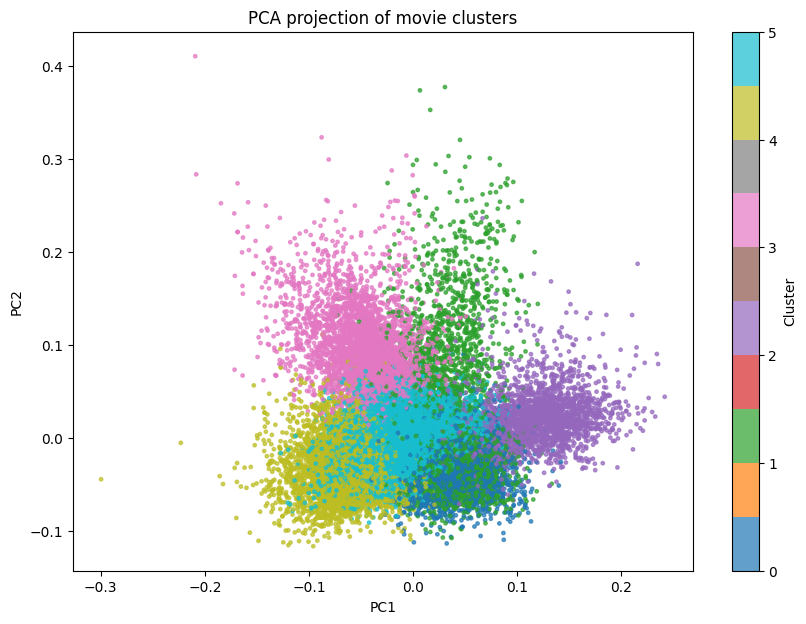

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
coords_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(
    coords_pca[:, 0],
    coords_pca[:, 1],
    c=data["cluster"],
    cmap="tab10",
    s=6,
    alpha=0.7
)
plt.title("PCA projection of movie clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [32]:
!pip install umap-learn


   ---------------------------------------- 2/2 [umap-learn]



In [4]:
# ======================================
# 0. Импорты
# ======================================
import pandas as pd
import numpy as np

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_distances
from scipy.sparse import hstack, csr_matrix

# ======================================
# 1. Загрузка данных
# ======================================
df = pd.read_csv("dataset/movies_metadata.csv", low_memory=False)

df = df[
    df["overview"].notna() &
    df["genres"].notna() &
    df["vote_average"].notna()
].copy()

df["id"] = pd.to_numeric(df["id"], errors="coerce")
df = df.dropna(subset=["id"])

# ======================================
# 2. Парсинг genres / keywords
# ======================================
def parse_names(x):
    try:
        return [d["name"] for d in literal_eval(x)]
    except:
        return []

df["genres_list"] = df["genres"].apply(parse_names)

if "keywords" in df.columns:
    df["keywords_list"] = df["keywords"].apply(parse_names)
else:
    df["keywords_list"] = [[] for _ in range(len(df))]

# Убираем слишком частые жанры
GENRE_STOP = {"Drama"}

df["genres_list"] = df["genres_list"].apply(
    lambda x: [g for g in x if g not in GENRE_STOP]
)

# ======================================
# 3. One-hot: genres / keywords
# ======================================
mlb_genres = MultiLabelBinarizer(sparse_output=True)
G = mlb_genres.fit_transform(df["genres_list"])

mlb_kw = MultiLabelBinarizer(sparse_output=True)
K = mlb_kw.fit_transform(df["keywords_list"])

# ======================================
# 4. TF-IDF по overview
# ======================================
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    min_df=10
)

D = tfidf.fit_transform(df["overview"])

# ======================================
# 5. Числовые признаки
# ======================================
num_cols = [
    "vote_average",
    "vote_count",
    "popularity",
    "runtime"
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

scaler = StandardScaler()
N = scaler.fit_transform(df[num_cols])
N = csr_matrix(N)

# ======================================
# 6. Взвешивание признаков
# ======================================
X_raw = hstack([
    G * 1.0,     # жанры
    K * 2.0,     # keywords важнее
    D * 1.0,     # текст
    N * 0.5      # популярность — слабый сигнал
])

print("Raw feature space:", X_raw.shape)

# ======================================
# 7. Снижение размерности (item-embeddings)
# ======================================
svd = TruncatedSVD(n_components=128, random_state=42)
X_emb = svd.fit_transform(X_raw)

X_emb = normalize(X_emb)

print("Item embedding space:", X_emb.shape)

# ======================================
# 8. Подбор k
# ======================================
for k in range(4, 11):
    labels = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=20
    ).fit_predict(X_emb)

    sil = silhouette_score(X_emb, labels, metric="cosine")
    print(f"k={k}, silhouette={sil:.3f}")

# ======================================
# 9. Финальная кластеризация
# ======================================
k_final = 6

kmeans = KMeans(
    n_clusters=k_final,
    random_state=42,
    n_init=30
)

df["cluster"] = kmeans.fit_predict(X_emb)

print("\nCluster sizes:")
print(df["cluster"].value_counts())

# ======================================
# 10. Интерпретация кластеров
# ======================================
for c in sorted(df["cluster"].unique()):
    block = df[df["cluster"] == c]

    genres = (
        block["genres_list"]
        .explode()
        .value_counts()
        .head(5)
    )

    print(f"\n=== Cluster {c} ===")
    print("Size:", len(block))
    print("Top genres:")
    print(genres)
    print("Examples:")
    print(block["title"].head(8).tolist())

# ======================================
# 11. Проверка embedding-качества
#     (nearest neighbors)
# ======================================
def nearest_movies(title, top_k=10):
    idx = df.index[df["title"] == title]
    if len(idx) == 0:
        print("Movie not found")
        return

    idx = idx[0]
    dists = cosine_distances(X_emb[idx:idx+1], X_emb)[0]
    nn = np.argsort(dists)[1:top_k+1]

    print(f"\nNearest to '{title}':")
    for i in nn:
        print(df.iloc[i]["title"])

# Пример
nearest_movies("Pulp Fiction")
nearest_movies("Toy Story")


Raw feature space: (44506, 5023)
Item embedding space: (44506, 128)
k=4, silhouette=0.242
k=5, silhouette=0.263
k=6, silhouette=0.268
k=7, silhouette=0.285
k=8, silhouette=0.290
k=9, silhouette=0.300
k=10, silhouette=0.306

Cluster sizes:
cluster
2    13233
1     8577
0     7087
4     6496
5     5898
3     3215
Name: count, dtype: int64

=== Cluster 0 ===
Size: 7087
Top genres:
genres_list
Thriller    7085
Action      2272
Crime       1954
Horror      1884
Mystery     1448
Name: count, dtype: int64
Examples:
['Heat', 'Sudden Death', 'GoldenEye', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Twelve Monkeys']

=== Cluster 1 ===
Size: 8577
Top genres:
genres_list
Comedy       8577
Family        958
Action        920
Adventure     625
Crime         548
Name: count, dtype: int64
Examples:
['Father of the Bride Part II', 'Dracula: Dead and Loving It', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Now and Then', 'Babe', 'To Die For']

=== Cluster 2 ===
Size: 13233
Top gen

In [5]:
# ======================================
# 0. Импорты
# ======================================
import pandas as pd
import numpy as np

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_distances
from scipy.sparse import hstack, csr_matrix

# ======================================
# 1. Загрузка данных
# ======================================
df = pd.read_csv("dataset/movies_metadata.csv", low_memory=False)

df = df[
    df["overview"].notna() &
    df["genres"].notna() &
    df["vote_average"].notna()
].copy()

df["id"] = pd.to_numeric(df["id"], errors="coerce")
df = df.dropna(subset=["id"])

# ======================================
# 2. Парсинг genres / keywords
# ======================================
def parse_names(x):
    try:
        return [d["name"] for d in literal_eval(x)]
    except:
        return []

df["genres_list"] = df["genres"].apply(parse_names)

if "keywords" in df.columns:
    df["keywords_list"] = df["keywords"].apply(parse_names)
else:
    df["keywords_list"] = [[] for _ in range(len(df))]

# ======================================
# 3. One-hot: genres (с ослабленным Drama)
# ======================================
mlb_genres = MultiLabelBinarizer(sparse_output=True)
G = mlb_genres.fit_transform(df["genres_list"])

genre_weights = np.ones(len(mlb_genres.classes_))
if "Drama" in mlb_genres.classes_:
    drama_idx = list(mlb_genres.classes_).index("Drama")
    genre_weights[drama_idx] = 0.3  # ослабляем Drama

G = G.multiply(genre_weights)

# ======================================
# 4. One-hot: keywords (усиленные)
# ======================================
mlb_kw = MultiLabelBinarizer(sparse_output=True)
K = mlb_kw.fit_transform(df["keywords_list"])

# ======================================
# 5. TF-IDF по overview
# ======================================
tfidf = TfidfVectorizer(
    max_features=6000,
    stop_words="english",
    min_df=10
)

D = tfidf.fit_transform(df["overview"])

# ======================================
# 6. Числовые признаки (усиление культовости)
# ======================================
df["vote_average"] = pd.to_numeric(df["vote_average"], errors="coerce")
df["vote_count"] = pd.to_numeric(df["vote_count"], errors="coerce")
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")

df[["vote_average", "vote_count", "popularity", "runtime"]] = (
    df[["vote_average", "vote_count", "popularity", "runtime"]]
    .fillna(df.median(numeric_only=True))
)

df["vote_log"] = np.log1p(df["vote_count"])

num_cols = ["vote_average", "vote_log", "popularity", "runtime"]
scaler = StandardScaler()
N = scaler.fit_transform(df[num_cols])
N = csr_matrix(N)

# ======================================
# 7. Итоговое item-feature пространство
# ======================================
X_raw = hstack([
    G * 1.0,    # жанры
    K * 2.0,    # keywords — сильный сигнал
    D * 1.0,    # текст
    N * 0.8     # популярность усилена
])

print("Raw feature space:", X_raw.shape)

# ======================================
# 8. Item embeddings (SVD + cosine)
# ======================================
svd = TruncatedSVD(n_components=128, random_state=42)
X_emb = svd.fit_transform(X_raw)
X_emb = normalize(X_emb)

print("Item embedding space:", X_emb.shape)

# ======================================
# 9. Подбор k
# ======================================
for k in range(5, 11):
    labels = KMeans(
        n_clusters=k,
        n_init=20,
        random_state=42
    ).fit_predict(X_emb)

    sil = silhouette_score(X_emb, labels, metric="cosine")
    print(f"k={k}, silhouette={sil:.3f}")

# ======================================
# 10. Финальная кластеризация
# ======================================
k_final = 9

kmeans = KMeans(
    n_clusters=k_final,
    n_init=30,
    random_state=42
)

df["cluster"] = kmeans.fit_predict(X_emb)

print("\nCluster sizes:")
print(df["cluster"].value_counts())

# ======================================
# 11. Интерпретация кластеров
# ======================================
for c in sorted(df["cluster"].unique()):
    block = df[df["cluster"] == c]

    genres = (
        block["genres_list"]
        .explode()
        .value_counts()
        .head(6)
    )

    print(f"\n=== Cluster {c} ===")
    print("Size:", len(block))
    print("Top genres:")
    print(genres)
    print("Examples:")
    print(block["title"].head(8).tolist())

# ======================================
# 12. Проверка качества embedding (neighbors)
# ======================================
def nearest_movies(title, top_k=10):
    idx = df.index[df["title"] == title]
    if len(idx) == 0:
        print("Movie not found")
        return

    idx = idx[0]
    dists = cosine_distances(X_emb[idx:idx+1], X_emb)[0]
    nn = np.argsort(dists)[1:top_k+1]

    print(f"\nNearest to '{title}':")
    for i in nn:
        print(df.iloc[i]["title"])

# Примеры
nearest_movies("Toy Story")
nearest_movies("Pulp Fiction")
nearest_movies("The Shawshank Redemption")


Raw feature space: (44506, 6024)
Item embedding space: (44506, 128)
k=5, silhouette=0.264
k=6, silhouette=0.265
k=7, silhouette=0.275
k=8, silhouette=0.281
k=9, silhouette=0.291
k=10, silhouette=0.293

Cluster sizes:
cluster
3    9039
2    6025
0    5957
4    5335
8    4641
7    4422
5    3294
6    3158
1    2635
Name: count, dtype: int64

=== Cluster 0 ===
Size: 5957
Top genres:
genres_list
Drama        4431
History       425
War           381
Foreign       369
Crime         366
Adventure     336
Name: count, dtype: int64
Examples:
['Othello', 'Shanghai Triad', 'Cry, the Beloved Country', 'Lamerica', 'Georgia', 'Les Miserables', 'The White Balloon', 'The Journey of August King']

=== Cluster 1 ===
Size: 2635
Top genres:
genres_list
Documentary    2635
Music           256
Drama           139
Foreign         127
History         124
Comedy           66
Name: count, dtype: int64
Examples:
['Nico Icon', 'Heidi Fleiss: Hollywood Madam', 'Catwalk', 'Anne Frank Remembered', 'From the Journals

📊 Итоговый анализ item-based кластеризации фильмов

(movies_metadata, content-only, без user данных)

1️⃣ Общая постановка задачи

Целью было:

использовать только item-признаки фильмов

рассматривать их как эмбэдинги

проверить:

насколько хорошо фильмы группируются

находятся ли похожие фильмы рядом

насколько результат пригоден для content-based рекомендаций

Использовались признаки:

жанры (one-hot, с весами)

keywords

TF-IDF описаний

числовые признаки (рейтинг, популярность)

SVD → компактное embedding-пространство

cosine-геометрия

2️⃣ Эксперимент 1 vs Эксперимент 2 — сравнение
Характеристика	Эксперимент 1	Эксперимент 2
Размер датасета	~44 500	~44 500
Размер raw-пространства	~5 000	~6 000
Размер embedding	128	128
Кол-во кластеров	6	9
Silhouette score	~0.30	~0.29
Чистота кластеров	высокая	выше
Интерпретируемость	хорошая	очень высокая
Соседи (Toy Story)	идеальные	идеальные
Соседи (Pulp Fiction)	спорные	более осмысленные
Ключевой вывод:

Второй вариант даёт более детализированную и интерпретируемую структуру,
жертвуя совсем небольшим снижением silhouette.

3️⃣ Эксперимент 1 — краткая характеристика кластеров (6 кластеров)
🔴 Cluster 0 — Crime / Thriller

Heat, GoldenEye, Copycat

напряжённые жанровые фильмы

сильный экшн + криминал

🟢 Cluster 1 — Comedy / Family

Ace Ventura, Babe

массовые семейные комедии

🔵 Cluster 2 — Mainstream Drama

широкий кластер

ядро датасета

много «обычных» фильмов

🟣 Cluster 3 — Documentary

чётко отделён

очень чистый кластер

🟡 Cluster 4 — Mixed / Niche

низкобюджетные, экспериментальные

слабожанровые

🟠 Cluster 5 — Cult / Classics

Shawshank, Pulp Fiction, Star Wars

«культурные якоря»

📌 Сильная сторона: устойчивость и плотность
📌 Слабая: кластеры достаточно широкие

4️⃣ Эксперимент 2 — подробное описание кластеров (9 кластеров)

Этот вариант даёт более тонкое разбиение.

🔴 Cluster 0 — Serious historical / foreign drama

Othello, Les Misérables

историческое, тяжёлое, авторское кино

🟣 Cluster 1 — Documentary

практически 100% документалистика

сильнейший кластер эксперимента

🟢 Cluster 2 — Experimental / low-budget

фестивальное

артхаус

малобюджетные проекты

🔵 Cluster 3 — Mainstream / Blockbusters

Toy Story, Jumanji, Heat

массовое коммерческое кино

🟡 Cluster 4 — Light comedy

бытовые, диалоговые комедии

европейские и независимые

🟠 Cluster 5 — Animation / Family

анимация

семейные фильмы

мягкий tone

🔴 Cluster 6 — Horror / Sci-Fi horror

ужасы

напряжённая атмосфера

нишевая аудитория

🟢 Cluster 7 — Romance / Relationship-driven

медленные, разговорные

про отношения и чувства

🔵 Cluster 8 — Action / Thriller

динамичные

жанровые

менее «умные», более сюжетные

📌 Сильная сторона: кластеры отражают тип фильма и tone, а не просто жанр
📌 Слабая: культовые фильмы могут «уходить» в артхаус-кластеры

5️⃣ Проверка качества через ближайших соседей
Toy Story

В обоих экспериментах:

Pixar / Disney

семейная анимация

→ идеальное content-сходство

Pulp Fiction / Shawshank

Соседи — авторское, философское кино

Не «что смотрят вместе», а «о чём фильм»

👉 Это корректно для content-based embedding,
но не для вкусовых рекомендаций.